In [ ]:
import json
import spacy
import warnings
import numpy as np
import pandas as pd
from collections import OrderedDict
import aspect_based_sentiment_analysis as absa

warnings.filterwarnings("ignore")
nlp = spacy.load('en')

In [ ]:
dfMergedTweets = pd.read_csv("/kaggle/input/merged_tweets.csv",encoding='latin1')
dfMergedTweets = dfMergedTweets[["text"]]
dfMergedTweets.head()

In [ ]:
dfMergedTweets["text"] = [" ".join(filter(lambda x:x[0]!='@', str(a).split())) for a in dfMergedTweets["text"]]

In [ ]:
dfMergedTweets["text"] = [(x.encode('ascii', 'ignore')).decode("utf-8") for x in dfMergedTweets["text"]]

In [ ]:
dfMergedTweets.head()

In [ ]:
n = len(dfMergedTweets)
#label_id_dict = {1: 'Negative', 2: 'Positive', 0: 'Neutral'}
sentiment_dict = {}
nlp1 = absa.load()
unhappyCustomers = 0

for i in range(n):
    
    input_text = [" ".join(filter(lambda x:x[0]!='@', str(dfMergedTweets.iloc[i][0]).split()))]
    
    aspect_terms = []
    for review in nlp.pipe(input_text):
        aspect_terms = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    
    
    input_text_tuple = (input_text[0])
    try:
        output = nlp1(input_text_tuple, aspects=aspect_terms)
    except:
        #print(str(i), input_text_tuple)
        continue
    
    for aspect in aspect_terms:
        val = output.subtasks[aspect].sentiment.value
        if val == 1:
            unhappyCustomers = unhappyCustomers + 1
            if aspect in sentiment_dict:
                sentiment_dict[aspect] = sentiment_dict[aspect] + 1
            else:
                sentiment_dict[aspect] = 1
    print(sentiment_dict)


In [4]:
with open('/kaggle/input/result-json/result_shrijan.json') as f:
    sentiment_dict = json.load(f)

In [8]:
sorted_sentiment_dict = sorted(sentiment_dict.items(), key = lambda x: (x[1]), reverse=True )

In [9]:
sorted_sentiment_dict

[('service', 38),
 ('account', 35),
 ('app', 26),
 ('phone', 25),
 ('driver', 21),
 ('issue', 20),
 ('delivery', 20),
 ('money', 20),
 ('people', 19),
 ('flight', 19),
 ('package', 17),
 ('one', 16),
 ('order', 16),
 ('guys', 16),
 ('help', 16),
 ('update', 15),
 ('time', 15),
 ('internet', 14),
 ('option', 12),
 ('item', 12),
 ('minutes', 11),
 ('message', 11),
 ('issues', 11),
 ('days', 10),
 ('hours', 10),
 ('bag', 10),
 ('customers', 10),
 ('day', 10),
 ('Thanks', 10),
 ('error', 10),
 ('problem', 10),
 ('#', 9),
 ('number', 9),
 ('food', 9),
 ('store', 9),
 ('response', 9),
 ('way', 9),
 ('trip', 9),
 ('address', 9),
 ('experience', 9),
 ('flights', 9),
 ('card', 8),
 ('info', 8),
 ('hour', 8),
 ('charge', 8),
 ('guy', 8),
 ('system', 8),
 ('game', 8),
 ('services', 7),
 ('line', 7),
 ('months', 7),
 ('email', 7),
 ('life', 7),
 ('password', 7),
 ('connection', 7),
 ('costume', 7),
 ('idea', 7),
 ('hold', 7),
 ('customer', 7),
 ('trouble', 7),
 ('link', 6),
 ('code', 6),
 ('points

In [10]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [14]:
sentence = ""
for key,val in sorted_sentiment_dict:
    if val<=3:
        continue
        
    for i in range(val):
        sentence = sentence + " " + key


In [15]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(sentence) 

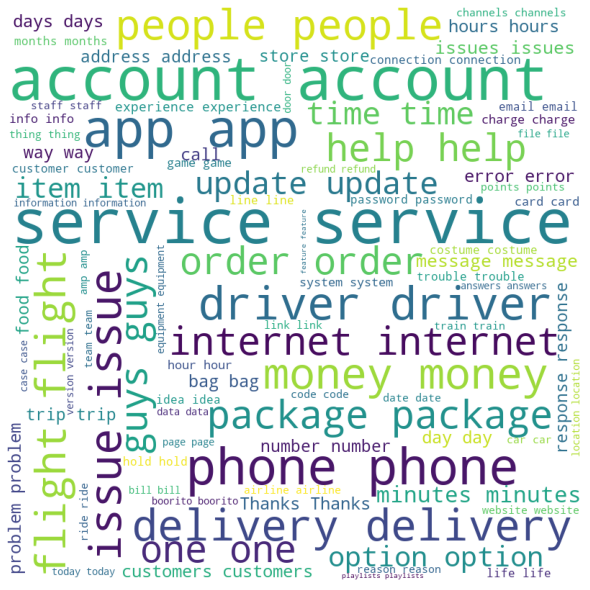

In [16]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 